# Quantifying the World
### Final Project - Building the Best Model
#### Kelly Carter, Swee K Chew, Vlad Orlov, Anjli Solsi

## Introduction

An integral activity for all companies to continually grow in success and profitability is looking forward to the future. This requires making predictions based on past and current data, which has contributed to the growth of data science and machine learning. An important task in utilizing data is creating appropriate and accurate models that guide decision-making. Generally, domain knowledge is essential in analyzing data and plays a large role in understanding the results. However, there are often scenarios when domain knowledge cannot be used. There are occasions when either random data is presented or one does not have the domain expertise to fully understand the data. In such cases, with no prior knowledge or metadata, the variables in the data must be treated independently and explored in preliminary analysis and data cleaning. 

## Background

We have been asked to prepare and model an uncharacterized dataset for a binary classification model. Throughout this report, the various steps taken in exploring the data and modeling will be explained. The knowledge provided includes that the classification needs to be performed on the column ‘y’ and that the features are labeled 'x0' through 'x49'. In estimating model performance, a vital consideration is in the prediction model, with an emphasis on correct prediction compared to false positives and false negatives. 

The goal of this analysis is to minimize the dollar cost on the provided dataset. There is no cost for the classification of true positives and true negatives, but there is a cost for false positives and false negatives. Each false positive will cost 10 dollars and each false negative will cost 500 dollars. 

## Methods

First, the data must be examined, cleaned, and modified for analysis. During this exploratory analysis, the dataset will be tested to check if explanatory variables are repeated. Correlation will also be checked to determine if a possible data leak is present, since correlation would introduce bias into the model. One hot encoding will be performed to convert categorical variables into numerical values that can be used in algorithms. An example of this would be changing the day of the week column into 7 different columns, with each day being its own column and a value of 0 or 1 being assigned based on the day.  

Another aspect of explanatory analysis is dealing with missing data. There are three categories of missing data. Missing Completely at Random indicates that there is no relationship between the missingness of the data and any observed or missing values. It is equally likely that data is recorded as it is missing. Missing at Random suggests that there is a systematic relationship between the propensity of missing values and the observed data. In other words, whether an observation is missing is not related to the missing values, but it is related to the values of an observed variable. Missing not at Random implies a discernible pattern to the missing data. An important consideration in choosing the correct approach is the missing data mechanism, since different approaches have different assumptions. 

Once the mechanism has been determined, there are four methods for imputing missing data. Listwise deletion drops any row that has missing data, which is not regularly used, as valuable data could be lost. Pairwise deletion omits a row of data if a value is missing in a certain column, but the row is retained for use on other columns. Single Imputation leverages patterns and uses data in other columns to determine if a similar trend can be followed for remaining missing values. Hot Deck is similar to single imputation but involves sub-setting data from a column and determining a sub-trend to follow.

For our model, we have chosen to use a random forest approach. In the analysis, a base model is first created and further refined with feature elimination. The accuracy of the model is determined by the following metrics:  

$$Recall=\frac{True\ Positives}{True\ Positives + False\ Negatives}$$

$$Precision=\frac{True\ Positives}{True\ Positives + False\ Positives}$$

**Recall** is a ratio of the correctly predicted positive instances. This metric penalizes false negatives, which are more costly to the client, so it will be utilized in determining model performance. 

**Precision** takes into consideration of all positives, both true and false, and penalizes a model that overfits positive results. This will also play a role in determining the appropriateness of the model for the data but to a lesser degree. 

## Data Cleaning and EDA

Before we can begin model building, the data must be appropriately cleaned and analyzed to ensure results from the built model are not affected or biased by imperfections within our data set. This is especially needed here as we don't know what each column within the data represents and cannot use our own pre-existing knowledge to interpret results or better understand the structure of the data. For data cleaning, EDA, and model building, we will rely heavily on functions found in the sklearn library, which are imported in the code blocks below.

In [1]:
import os
import random
import numpy as np
import pandas as pd  
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")

### Load Data

After importing our needed libraries and functions, the data is downloaded and the shape of the dataset is determined.

In [4]:
#Change the file path to where the file is

df = pd.read_csv("final_project.csv").sample(frac=1.0)

In [5]:
pd.options.display.max_columns = None
df.head(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
81048,0.744276,5.251734,-5.051656,10.424781,-4.853522,-4.109861,-7.344728,11.741162,-2.013181,0.384528,3.917474,-5.059535,1.046894,-5.850372,-5.842374,-2.189432,6.14921,-2.435973,-4.884823,5.482197,-2.743047,3.222325,-6.510889,-4.327968,asia,-0.351842,0.099430,-5.145996,-7.108383,Jun,tuesday,1.357807,0.01%,0.917803,0.637349,0.950621,2.380887,$536.51,9.546019,-1.249264,-2.292685,10.557142,2.734934,1.450936,-2.661196,-0.361389,10.517411,-1.146615,1.968236,15.019123,1
117972,-0.575503,-5.070590,12.991051,-4.429073,8.255099,-7.875910,18.888013,-47.621298,-11.424129,-7.469235,7.824517,3.418577,-8.894636,8.052494,1.491865,-4.691999,1.01215,-0.393339,8.157995,8.557553,3.861022,16.940928,-10.892302,7.016130,asia,1.583076,0.476654,15.639023,-1.548625,Jun,wednesday,-4.303489,-0.01%,0.417184,14.656569,-1.247905,1.454344,$92.32,23.115872,-6.274106,5.664953,25.564326,-0.438032,1.299866,-2.635216,-0.884379,-29.288922,3.919361,-0.467800,-25.140130,0


In [6]:
df.shape

(160000, 51)

We find the shape of the dataset to have 51 columns (50 explanatory and 1 response variable) and have 160,000 rows.

### EDA

We begin our Exploratory Data Analysis by examining the data type of each column and determining if there are any duplicated rows or missing values.

In [7]:
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

In [8]:
#Drop duplicated rows if any 
df = df.drop_duplicates()
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

In [9]:
df.shape

(160000, 51)

In [10]:
#Count of missing data
df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

Initial analysis found the majority of the explanatory variables to be floats, except for *x24*, *x29*, *x30*, *x32*, and *x37*, which we will examine in further detail. The response variable is found to be an integer, but is likely a Boolean due to the two rows previously examined show y variable value of 1 and 0; this needs to be further examined and confirmed.

After attempting to drop duplicated rows, we find that the data shape did not change showing that there were no duplicated rows. Additionally, when examining for missing values we find that all explanatory variables had missing values, ranging between 21 and 47 instances. This is very minimal considering the size of data set; with the variable having the most missing values only accounting for ~0.03% of all rows. The response variable was found to have no missing values.

In [11]:
#View the attributes with object data type
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head()

,x24,x29,x30,x32,x37
81048,asia,Jun,tuesday,0.01%,$536.51
117972,asia,Jun,wednesday,-0.01%,$92.32
35281,asia,sept.,thurday,-0.0%,$260.46
53482,asia,Jun,wednesday,-0.01%,$-727.26
71998,asia,July,wednesday,-0.01%,$232.44


After further review of the non-float explanatory variables, attributes *x32* and *x37* are found to be numeric variables. Since they include a % or $ sign, they were categorized as objects. These signs are removed and the attributes are converted to floats.

Additionally, the response variable is converted to a Boolean data type as all value types are found to be either 0 or 1 after examining the data file. Based on this, we are looking at a classification problem.

In [12]:
#remove '$' or '%' and change to float
df['x32'] = df.x32.str.replace('%', '')
df['x32'] = df['x32'].astype('float')

df['x37'] = df.x37.str.replace('$', '')
df['x37'] = df['x37'].astype('float')

#change the response variable to boolean
df['y'] = df['y'].astype('bool')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 81048 to 17032
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-n

In [14]:
#Check the variables with the object dtype again
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head()

,x24,x29,x30
81048,asia,Jun,tuesday
117972,asia,Jun,wednesday
35281,asia,sept.,thurday
53482,asia,Jun,wednesday
71998,asia,July,wednesday


Upon further examination of the attributes that are object types, we find that *x24* appears to represent continent, *x29* represents month, *x30* represents day of the week.

We will want to examine these categorical variables further for imperfections and may need to clean up the data. As seen above, there are variations for how month is captured, differing uses of formatting and abbreviations ("sept." vs. "Jun" vs. "July), and misspelling of a weekday ("thurday").

Before examining the categorical variables in further detail, we are going to examine the numeric explanatory variables and the response variable. This is done examining summary statistics and a boxplot for each attribute.

In [15]:
df.shape

(160000, 51)

In [16]:
#Explore numeric variables and the response
df_num_y = df.drop(['x24', 'x29', 'x30'], axis=1)
df_num_y.shape

(160000, 48)

In [17]:
df_num_y.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,159957.000000,159970.000000,159964.000000,159969.000000,159966.000000,159965.000000,159974.000000,159973.000000,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159978.000000,159964.000000,159970.000000,159965.000000,159961.000000,159969.000000,159959.000000,159959.000000,159970.000000,159973.000000,159977.000000,159969.000000,159977.000000,159964.000000,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,0.002253,0.030232,-1.334402,0.007669,0.008104,0.001215,0.006223,0.012040,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,-0.000806,-0.001066,-0.004159,0.031543,-0.005945,-0.000011,-0.006567,-0.000426,0.000936,0.006453,0.377628,6.059130,0.004253,-2.316526,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,7.871429,8.769633,14.750990,8.953837,6.964097,3.271779,4.984065,7.569351,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,1.263656,0.843258,6.774047,14.439534,2.767508,0.010400,1.747762,8.014180,2.379558,1.593183,999.945334,16.891603,5.134322,17.043549,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.857484,-32.003555,-72.896705,-12.289364,-0.050000,-7.451454,-36.116606,-10.008149,-6.866024,-4734.540000,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,-5.288196,-5.903274,-11.379492,-6.029945,-4.696755,-2.207774,-3.344027,-5.071470,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,-0.852784,-0.567293,-4.597919,-9.702464,-1.874206,-0.010000,-1.183681,-5.401084,-1.610337,-1.068337,-691.370000,-5.249882,-3.458716,-13.953629,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,-0.018176,0.010941,-1.624439,-0.003473,0.002467,0.003535,0.012754,0.024541,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,-0.003723,-0.001501,0.037138,0.244210,0.002013,0.000000,-0.006079,-0.013089,-0.002399,0.003645,-13.760000,6.184410,0.019068,-2.701867,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,5.331573,5.935032,8.374524,6.041959,4.701299,2.211660,3.366853,5.101962,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,0.851765,0.567406,4.649773,9.936995,1.856369,0.010000,1.179460,5.411667,1.603089,1.079895,664.210000,17.420148,3.463308,8.981616,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,37.945583,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048,19.652986,33.515550,27.814560,46.237503,24.863012,58.490500,5.314169,3.951652,28.645074,67.753845,12.279356,0.050000,7.787120,34.841428,9.892426,6.999544,5546.990000,90.467981,21.545591,88.824477

Examining the summary statistics, we find that the majority of the numeric explanatory variables have a mean around 0. Only five attributes have means with an absolute value greater than 2, *x7*, *x38*, *x40*, *x41*, and *x46*, with *x46* have the largest mean with an absolute value of 12.76.

We additionally find that for the majority of attributes that the mean and median are close in value. There is only one attribute where the difference between the mean and median is greater than 1, *x37*; the difference here is 14.14, but this variable also has the largest range of attributes at 10,281.53 (the next highest range is 352.69, which also happens to be *x46*). This range shows that this mean vs. median difference wouldn't negate the possibility of this attribute having a normal distribution. We additionally find that the five attributes that have means with an absolute value of greater than 2 also have larger ranges comparitively, with all five being in the top seven largest ranges.

Based on these findings, it appears that the numeric explanatory variables have distributions that similar to normal distributions centered on 0. We will explore boxplots for each of these attributes next to see if this observation holds.

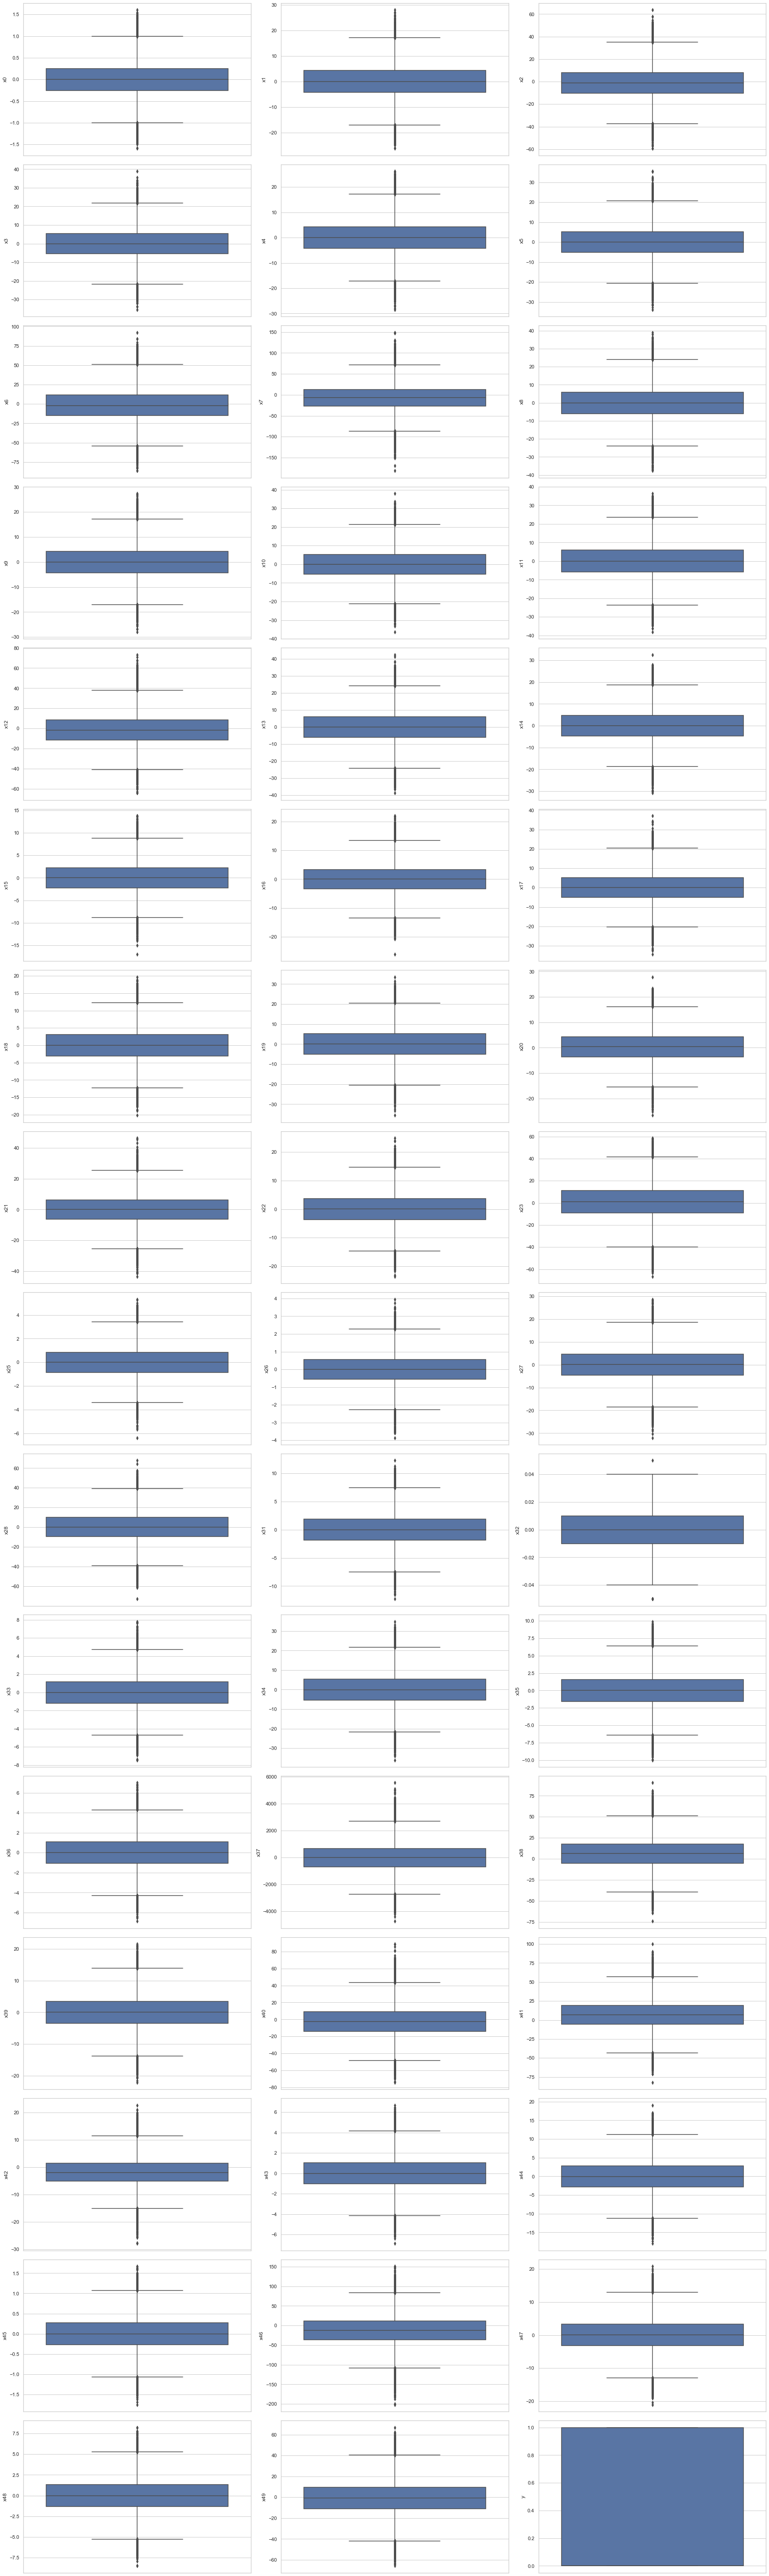

In [18]:
n_rows = 16
n_columns = 3
f, axes = plt.subplots(n_rows, n_columns, figsize=(8 * n_columns, 5 * n_rows))
for i, c in enumerate(df_num_y.columns):
    sns.boxplot(y = c, data = df_num_y, ax = axes[i // n_columns, i % n_columns])
plt.tight_layout()
plt.show()

<center>**Figure 1:** Box Plots that show the Distribution of Numeric Attributes and Response Variable</center>

The boxplots show further evidence for the explanatory attributes resembling normal distributions as the interquartile range boxes appear centered on the median and the minimum and maximum whiskers appear to be of equal length.

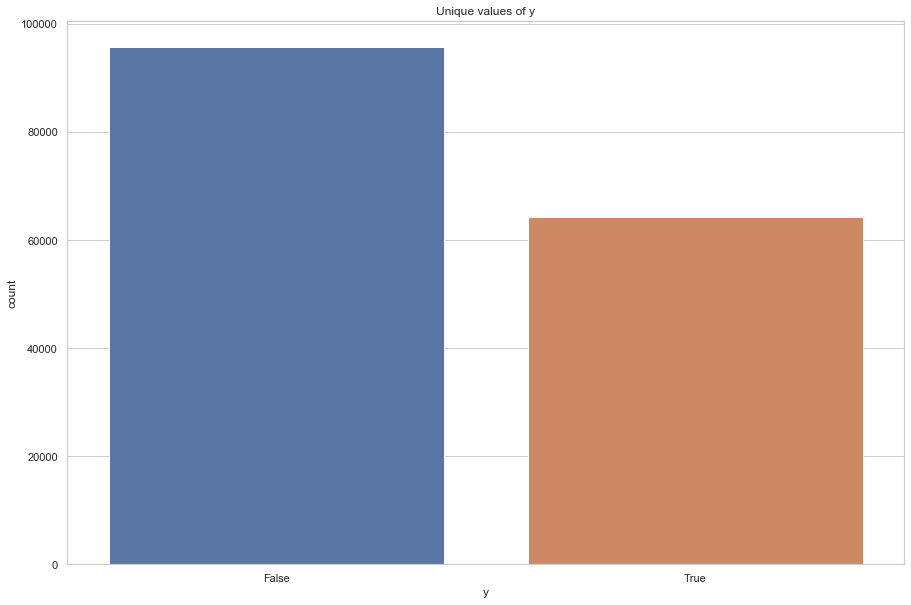

In [26]:
ax = sns.countplot(df['y'], order = df['y'].value_counts().index)
_ = ax.set(title='Unique values of y')

<center>**Figure 2:** Frequency Plot for the Response Variable, y </center>

Further review of the response variable show a roughly 40/60, true/false distribution.

Next, we complete further analysis on the categorical variables. This is done by the use of frequency plots for counts of each unique variable and counts of each unique variable by response type for each categorical variable.

Additionally, as we do this examination, we need to ensure that there no imperfections in the data as previously noted.

In [19]:
df_cat.describe()

,x24,x29,x30
count,159972,159970,159970
unique,3,12,5
top,asia,July,wednesday
freq,138965,45569,101535


First, we examine *x24*, which represents region, slightly different than our previous hypothesis. There are three unique values, Asia, Europe, and America, which could represent business regions. 

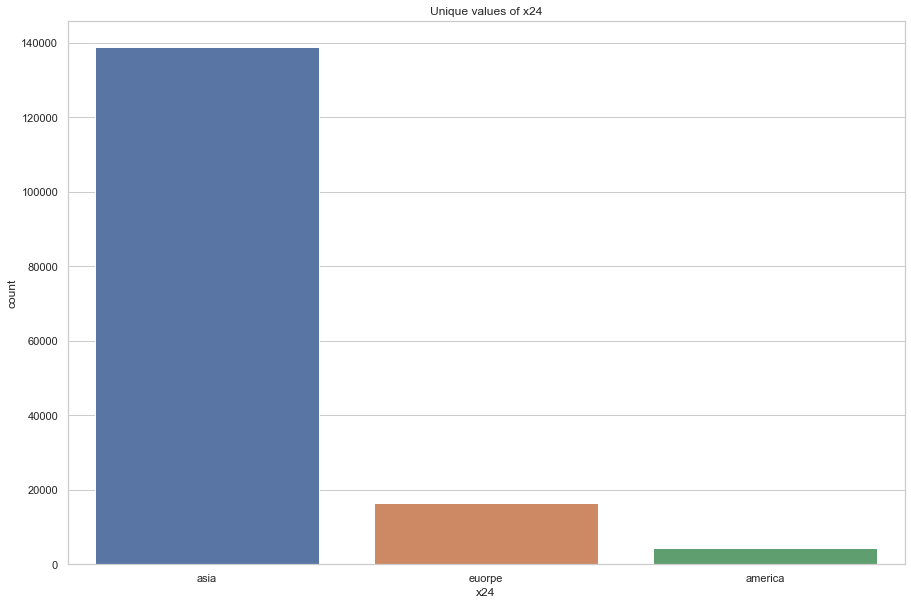

In [20]:
ax = sns.countplot(df_cat.x24, order = df_cat.x24.value_counts().index)
_ = ax.set(title='Unique values of x24')

<center>**Figure 3:** Frequency Plot for the Categorical Attribute, x24 </center>

The majority of values of *x24* are equal to Asia, with a frequency of 138,965 representing 86.87% of all values. Next highest is Europe with 16,538 values and the lowest is America with 4,469 values. 28 rows are missing this value.

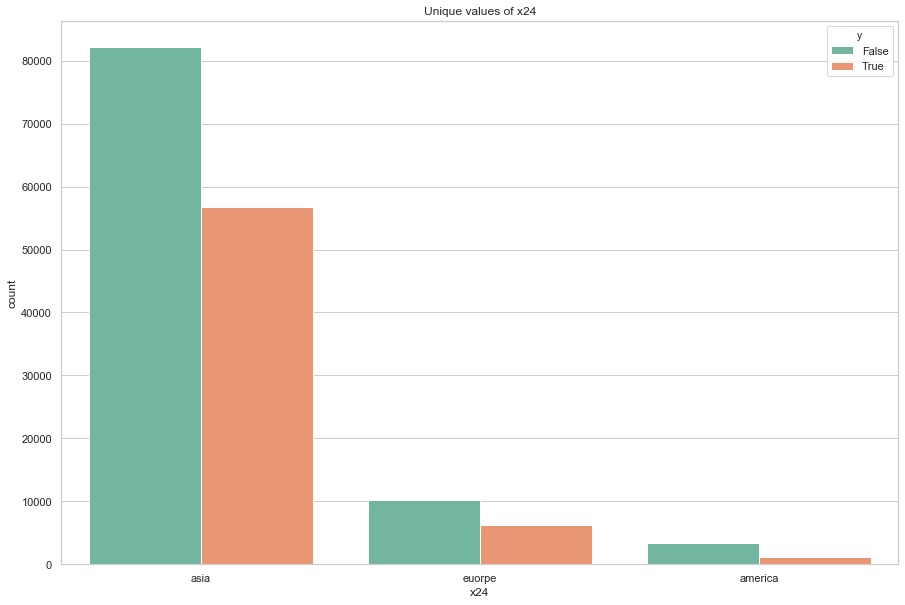

In [21]:
ax = sns.countplot(df_cat.x24, hue=df['y'], order = df_cat.x24.value_counts().index, palette="Set2")
_ = ax.set(title='Unique values of x24')

<center>**Figure 4:** Frequency Plot for the Categorical Attribute (x24) by Response Variable </center>

As noted from Figure 2, roughly 40% of the rows have a response variable equaling true and roughly 60% have a response variable equaling false. The frequency distribution of Asia and Europe look to roughly follow the distribution of the overall response variable, but America looks to have more values equal false than expected.

Next, we examine *x29*, which represents month, same as our previous hypothesis. There are twelve unique values, one representing each month. Of note, we assume that "Dev" is a typo and meant to represent December.

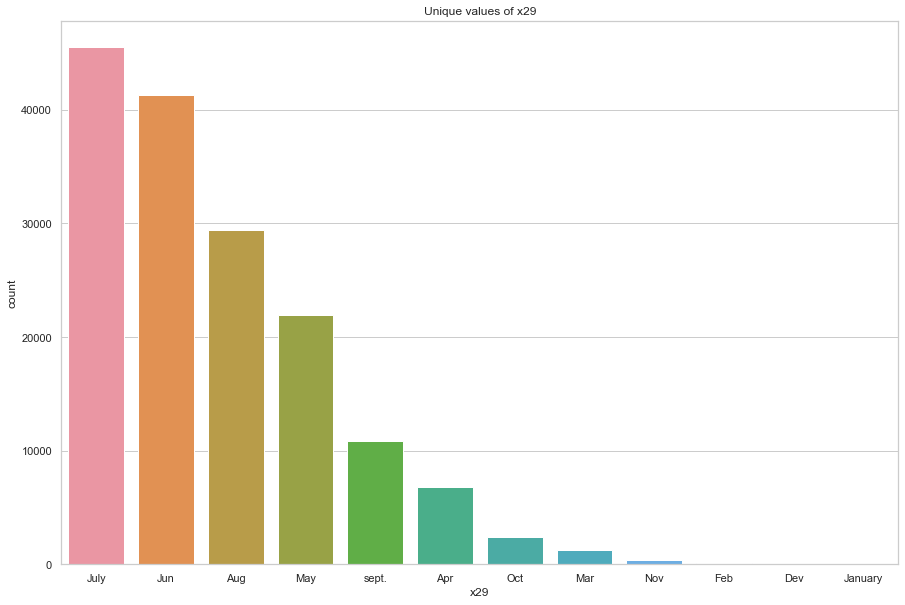

In [22]:
ax = sns.countplot(df_cat.x29, order = df_cat.x29.value_counts().index)
_ = ax.set(title='Unique values of x29')

<center>**Figure 5:** Frequency Plot for the Categorical Attribute, x29 </center>

The majority of values of *x29* are equal to July, with a frequency of 45,569 representing 28.49% of all values. Closely behind is June with a frequency of 41,239 followed by August with a frequency of 29,406. We note that these all summer months, and represent 72.65% of all values.

The next two months with the highest frequencies are May (21,939 instances) and September (10,819) instances, the months right before and right after the summer months. All other months have significantly less instances with the winter months having a negligible number of occurrences. 30 rows are missing this value.

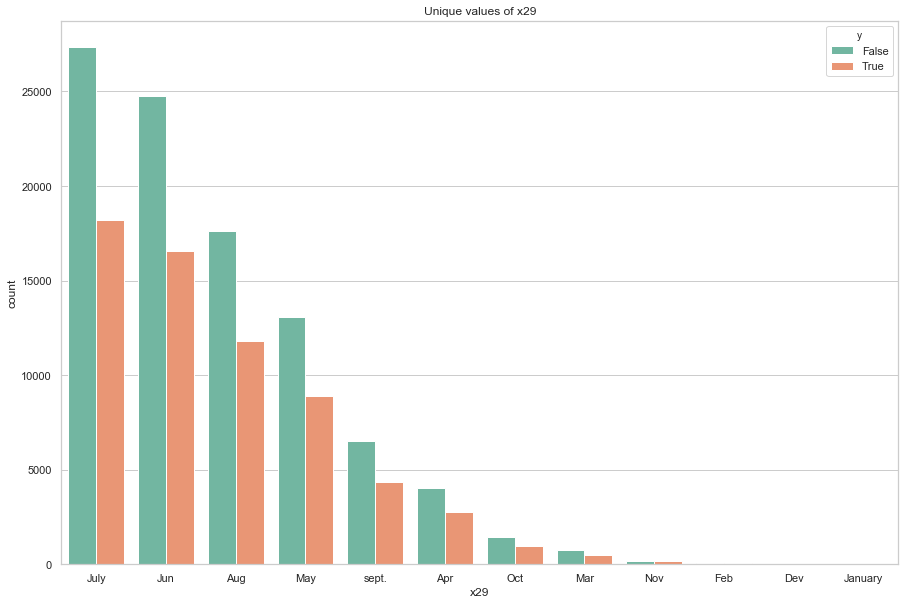

In [23]:
ax = sns.countplot(df_cat.x29, hue=df['y'], order = df_cat.x29.value_counts().index, palette="Set2")
_ = ax.set(title='Unique values of x29')

<center>**Figure 6:** Frequency Plot for the Categorical Attribute (x29) by Response Variable </center>

The summer months all have the 40/60, true/false distribution that the overall dataset has. All other months of a non- negligible size appear to follow the same frequency distribution as well.

Finally, we examine *x30*, which represents weekdays, similar to previous hypothesis of day of the week. The dataset only including only business days show further evidence that this is a business-related dataset. There are five unique values, one representing each business day. Of note, we assume that "thurday" is a typo and meant to represent Thursday.

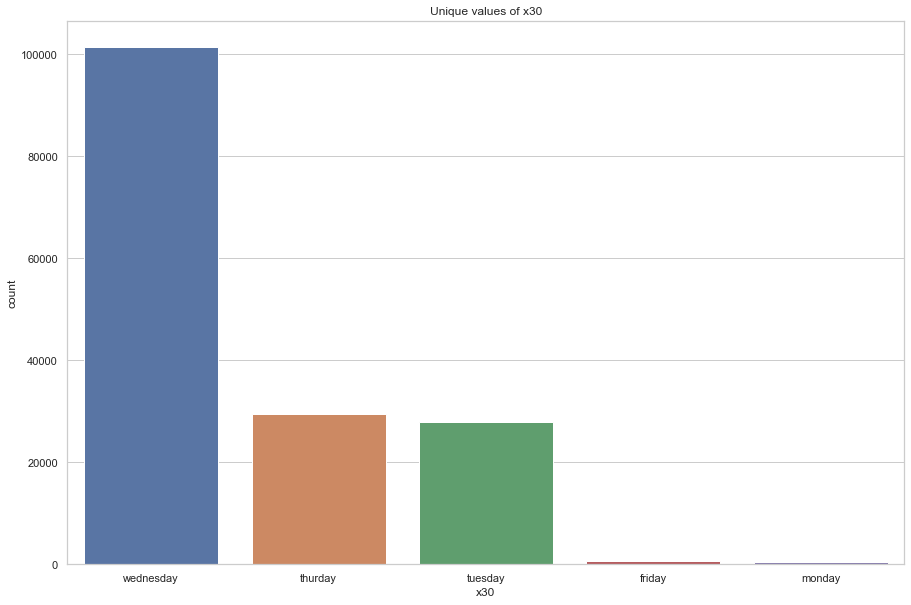

In [24]:
ax = sns.countplot(df_cat.x30, order = df_cat.x30.value_counts().index)
_ = ax.set(title='Unique values of x30')

<center>**Figure 7:** Frequency Plot for the Categorical Attribute, x30 </center>

The majority of values of *x30* are equal to Wednesday, with a frequency of 101,535 representing 63.47% of all values. The next two highest frequencies are Thursday and Tuesday, which are close to equivalent in value at 29,249 and 27,954 respectively; it should be noted that these are the days directly before and after Wednesday. Both Friday and Monday have a negligible number of occurrences, representing a combined of less than 1% of all rows. 30 rows are missing this value.

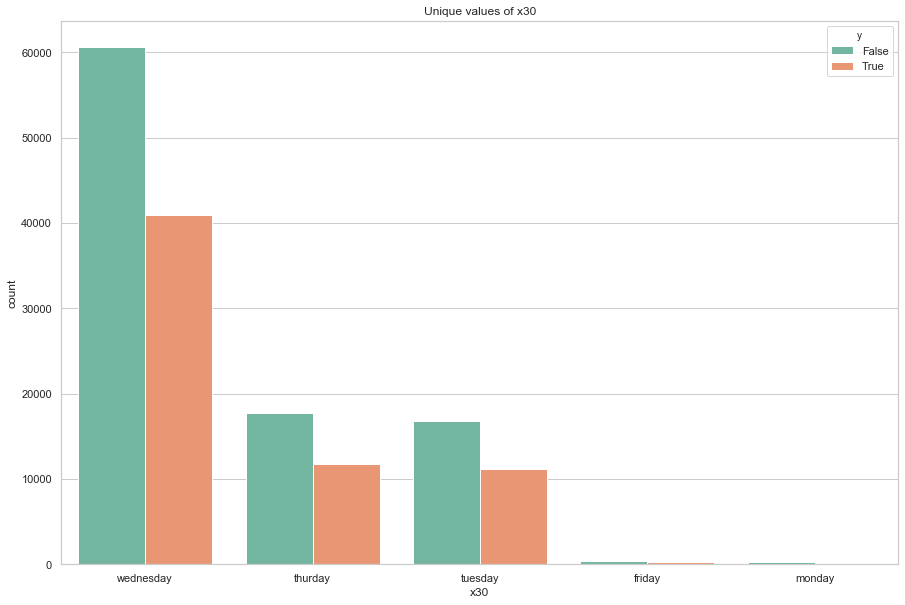

In [25]:
ax = sns.countplot(df_cat.x30, hue=df['y'], order = df_cat.x30.value_counts().index, palette="Set2")
_ = ax.set(title='Unique values of x30')

<center>**Figure 8:** Frequency Plot for the Categorical Attribute (x30) by Response Variable </center>

Wednesday, Thursday, and Tuesday all have the 40/60, true/false distribution that the overall dataset has.

#### Missing Values

Next we examine the missing values in the dataset to determine the best way to impute the data. For the categorical variables, we create indicator variables which will make instances of missing variables all 0's for that attribute. There are so few instances of missing variables this will have a negligible impact and allow all rows to be useable.

For the numeric variables, we further examine the missing values to determine if there is any pattern to the missingness.

In [27]:
X_cat = pd.get_dummies(df_cat)
X_num = df_num_y[df_num_y.columns.difference(['y'])]

In [28]:
X_cat.shape, X_num.shape

((160000, 20), (160000, 47))

In [29]:
def print_missing_values_stats(X):
    for v in X.columns:
        nulls = X[v][X[v].isnull() == True].index.tolist()
        nulls.sort()
        if len(nulls) > 0:
            print(f'{v}: {len(nulls)}, {nulls}')
            print('')

In [30]:
print_missing_values_stats(X_cat)

In [31]:
print_missing_values_stats(X_num)

x0: 26, [1282, 2290, 7491, 15484, 22497, 23192, 28954, 35999, 53729, 72318, 89922, 91019, 94393, 99268, 102350, 106226, 120560, 132472, 135679, 142823, 151123, 155246, 157238, 158239, 159224, 159524]

x1: 25, [269, 3904, 18170, 40299, 43772, 46051, 54302, 63871, 73401, 76946, 79935, 91884, 92187, 97060, 106076, 106931, 111839, 118680, 119489, 126167, 128371, 143211, 152513, 156865, 157417]

x10: 43, [2315, 7132, 8935, 11853, 13971, 15352, 16457, 20326, 24956, 28246, 32662, 39921, 41706, 48193, 58548, 64630, 66039, 66104, 67043, 67246, 78042, 80997, 81139, 83274, 83769, 99401, 99462, 104870, 105517, 106869, 109587, 110821, 111472, 117559, 119661, 123244, 127475, 129078, 132336, 137295, 138166, 148115, 152281]

x11: 30, [721, 6506, 8563, 22104, 24255, 26625, 26676, 37927, 44715, 50656, 59892, 63877, 65043, 66501, 69326, 76311, 86759, 98088, 119189, 120452, 125420, 125704, 125976, 129243, 132593, 136175, 140064, 148790, 152207, 155157]

x12: 36, [1393, 2074, 12333, 14070, 17783, 22563, 23

All missing values appear to be missing at random both within the data rows and among the data attributes and as previously mentioned, the number of missing value is very small for all attributes. Thus, it is safe to use mean imputation, where the missing values are replaced with the mean of the non-missing values of that attribute.

In [32]:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [33]:
num_imputer.fit(X_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [34]:
X_num = pd.DataFrame(num_imputer.transform(X_num), columns=X_num.columns)

In [35]:
print_missing_values_stats(X_num)

The print statement above confirms that the imputation worked and there are no more missing values.

#### Data Normalization

Finally, before we begin model building, the numeric data is normalized to diminish the effect of the larger spreads we denoted earlier when examining summary statistics. We do this using standardizing these attributes to have a mean of 0 and a standard deviation of 1.

In [36]:
scaler = StandardScaler()
scaler.fit(X_num)
X_num = pd.DataFrame(scaler.transform(X_num), columns=X_num.columns)

In [37]:
X = pd.concat([pd.get_dummies(X_cat), X_num], axis=1)
y = df['y'].astype(np.int)
X.shape, y.shape

((160000, 67), (160000,))

In [38]:
X.describe()

,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dev,x29_Feb,x29_January,x29_July,x29_Jun,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday,x0,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x2,x20,x21,x22,x23,x25,x26,x27,x28,x3,x31,x32,x33,x34,x35,x36,x37,x38,x39,x4,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x5,x6,x7,x8,x9
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05
mean,0.027931,0.868531,0.103362,0.042256,0.183787,0.000144,0.000875,0.000056,0.284806,0.258306,0.007694,0.137119,0.002106,0.015044,0.067619,0.003525,0.003050,0.183931,0.174712,0.634594,-1.804598e-17,1.102035e-17,4.756820e-17,-3.927414e-19,-1.559239e-17,7.489842e-18,9.399079e-18,4.391452e-17,4.215170e-17,2.367169e-17,1.360440e-17,2.464695e-17,-3.920059e-17,7.122081e-18,2.920511e-17,-7.996034e-18,5.918877e-19,1.280955e-17,4.336880e-17,-2.148282e-18,4.838872e-17,-4.632753e-18,-1.924017e-17,-6.900256e-16,-4.476280e-18,3.270856e-17,2.533251e-17,2.837938e-17,-1.173367e-17,4.356654e-17,8.763823e-19,2.820313e-17,2.671197e-17,-6.403766e-17,6.213814e-17,-2.494255e-17,-2.629494e-17,1.855738e-17,-3.249900e-17,-1.504803e-17,2.673192e-17,-1.673939e-17,1.347533e-18,3.095996e-17,1.590308e-17,-5.048045e-17,2.331468e-18
std,0.164776,0.337913,0.304433,0.201174,0.387312,0.011989,0.029568,0.007500,0.451324,0.437705,0.087376,0.343974,0.045846,0.121727,0.251091,0.059267,0.055143,0.387429,0.379722,0.481545,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.288823e+00,-4.144980e+00,-4.613370e+00,-4.347593e+00,-4.262143e+00,-4.326085e+00,-4.439442e+00,-5.197628e+00,-5.226939e+00,-4.546090e+00,-4.451716e+00,-4.695257e+00,-4.388525e+00,-4.646713e+00,-4.620455e+00,-4.370773e+00,-4.518874e+00,-5.036420e+00,-4.573763e+00,-4.724280e+00,-5.051164e+00,-4.396284e+00,-4.438995e+00,-4.807344e+00,-4.260227e+00,-4.507126e+00,-4.206687e+00,-4.314053e+00,-4.735532e+00,-4.757673e+00,-4.305838e+00,-4.460683e+00,-4.209861e+00,-4.757963e+00,-5.107344e+00,-4.478940e+00,-4.317236e+00,-4.423038e+00,-5.165183e+00,-4.410353e+00,-4.386877e+00,-4.330971e+00,-4.412028e+00,-4.388436e+00,-5.691438e+00,-4.231245e+00,-4.404195e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.751329e-01,-6.721856e-01,-6.719363e-01,-6.765313e-01,-6.809411e-01,-6.741970e-01,-6.754508e

## Model Building

Before we begin building our model, we split our data into 2 datasets: 80% for training, 20% for testing. We decided to do rigid split on our data instead of cross validation since size of the data will require a lot of time to run proper k-fold CV.  

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((128000, 67), (32000, 67))

#### Feature Importance and base model

First, we fit simple Random Forest model as a starting point to our classification problem to see where we are in terms of precision and recall. We do not set any parameters ourselves because most of the important parameters (max_depth, max_leaf_nodes, min_samples_leaf, min_samples_split) are conveniently set to the values we want. For this model, recall is 50 times more important than precision, since each false negative costs 500 dollars while each false positive costs only 10 dollars. Thus, we will pay more attention to recall.

In [70]:
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_base.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
(roc_auc_score(y_test, rf_base.predict(X_test)),
precision_score(y_test, rf_base.predict(X_test)),
recall_score(y_test, rf_base.predict(X_test)))

(0.9127562061021475, 0.9323408881826545, 0.8677512259671518)

While our simple Random Forest model has AUC and precision scores above 90%, the recall score is only 86.78% meaning model improvements need to be made in order to decrease penalty costs. We will review feature important next to determine where we can begin making improvements.

In [42]:
def get_feature_importance(importance_values, feature_names):
    feature_importance = zip(importance_values, feature_names) 
    feature_importance = sorted(feature_importance, key=lambda t: t[0])
    feature_importance = pd.DataFrame(feature_importance, columns=['importance', 'feature'])    
    return feature_importance

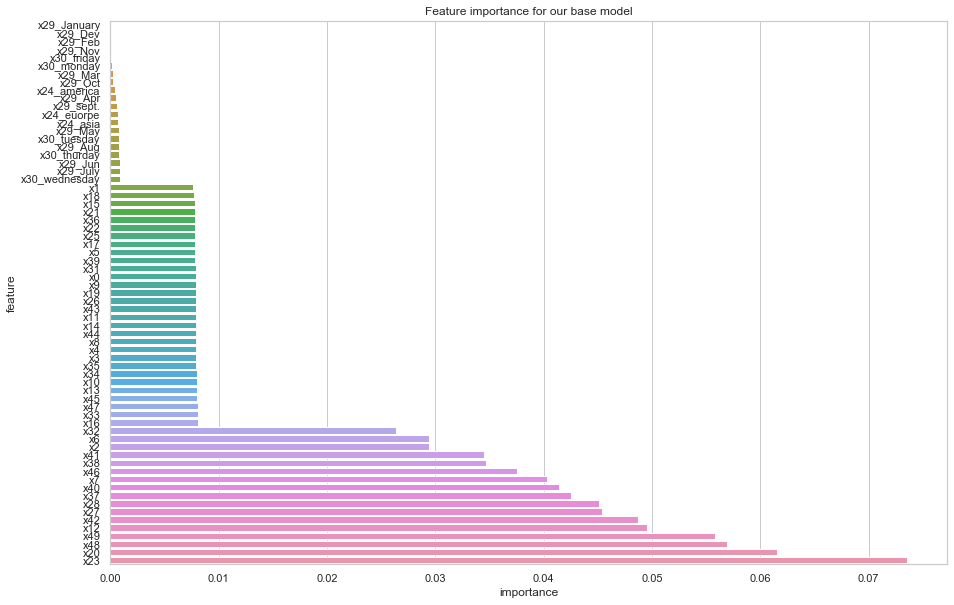

In [74]:
sorted_importance = get_feature_importance(rf_base.feature_importances_, X_train.columns)
ax = sns.barplot(x='importance', y='feature', data=sorted_importance)
_ = ax.set_title('Feature importance for our base model')

<center>**Figure 9:** Feature Importance Measures of Our Baseline Model for All Attributes </center>

Figure 9 shows that all categorical variables are not important in our simple Random Forest model and have importance measures of less than 0.005. Thus, we will drop all categorical variables and fit a new baseline model using only numeric attributes.

In [44]:
X_train = X_train[sorted_importance[sorted_importance.importance > 0.005].feature.tolist()]
X_test = X_test[sorted_importance[sorted_importance.importance > 0.005].feature.tolist()]
X_train.shape, X_test.shape 

((128000, 47), (32000, 47))

In [45]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
(roc_auc_score(y_test, rf_base.predict(X_test)),
precision_score(y_test, rf_base.predict(X_test)),
recall_score(y_test, rf_base.predict(X_test)))

(0.914544597225626, 0.9317142144223571, 0.8719545419164008)

Our updated baseline model has AUC and precision scores comparable to our previous model. The recall score has increased to 87.20% showing some improvement, but we still need to do more to minimize penalty costs. 

#### Interaction Features

To continue to find model improvements, we look to add interaction features. Because we have no description of the dataset or the luxury of domain expert to show us what features are important, testing interactions features can find relationships between attributes that are important for overall prediction.

In [47]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit(X_train)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True,
                   order='C')

In [48]:
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly.shape, X_test_poly.shape

((128000, 1128), (32000, 1128))

We now have 1,128 attributes: our 47 numeric attributes and an interaction feature for each combination of two attributes. We need to get rid of unimportant features to avoid overfitting the model. We do this by running recursive feature elimination. 

In [49]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50)
selector = RFECV(estimator, step=25, cv=3, scoring='roc_auc', min_features_to_select=100, verbose=2)
selector.fit(X_train_poly, y_train)

Fitting estimator with 1128 features.
Fitting estimator with 1103 features.
Fitting estimator with 1078 features.
Fitting estimator with 1053 features.
Fitting estimator with 1028 features.
Fitting estimator with 1003 features.
Fitting estimator with 978 features.
Fitting estimator with 953 features.
Fitting estimator with 928 features.
Fitting estimator with 903 features.
Fitting estimator with 878 features.
Fitting estimator with 853 features.
Fitting estimator with 828 features.
Fitting estimator with 803 features.
Fitting estimator with 778 features.
Fitting estimator with 753 features.
Fitting estimator with 728 features.
Fitting estimator with 703 features.
Fitting estimator with 678 features.
Fitting estimator with 653 features.
Fitting estimator with 628 features.
Fitting estimator with 603 features.
Fitting estimator with 578 features.
Fitting estimator with 553 features.
Fitting estimator with 528 features.
Fitting estimator with 503 features.
Fitting estimator with 478 featu

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=-1,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False),
      min_features_to_select=100, n_jobs=None, scoring='roc_auc', step=25,
      verbose=2)

In [50]:
selector.support_[selector.support_ == True].shape

(100,)

After recursive feature elimination is run, we are left with the 100 most important features. This will be used as the basis for further model improvements.

In [51]:
X_train_sel = X_train_poly[:, selector.support_]
X_test_sel = X_test_poly[:, selector.support_]

#### Final Model

Now that we have removed unimportant features, we refit our Random Forest model on selected features.

In [52]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_sel, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
(roc_auc_score(y_test, model.predict(X_test_sel)),
precision_score(y_test, model.predict(X_test_sel)),
recall_score(y_test, model.predict(X_test_sel)))

(0.9367198501921032, 0.9424842919284678, 0.9107184556705846)

Our updated baseline model sees improvements in all scores, specifically a significant increase in recall with an improved score of 91.07%, up almost 4% from our previous baseline model.

Next, we will test various combinations of class weights to see if we can find a combination that will create a model with improved scores.

In [56]:
a = np.arange(0.5, 0.9, 0.1)
b = 1.0 - a
weights = map(lambda t: {1: t[0], 0: t[1]}, zip(a, b))
for weight in weights:
    weighted_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight={1: weight[0], 0: weight[1]})
    _ = weighted_model.fit(X_train_sel, y_train)
    scores = (roc_auc_score(y_test, weighted_model.predict(X_test_sel)),
              precision_score(y_test, weighted_model.predict(X_test_sel)),
              recall_score(y_test, weighted_model.predict(X_test_sel)))
    print(f'{weight}: {scores}')

{1: 0.5, 0: 0.5}: (0.9367198501921032, 0.9424842919284678, 0.9107184556705846)
{1: 0.6, 0: 0.4}: (0.9375917604112428, 0.9438265635074146, 0.9115746866972834)
{1: 0.7, 0: 0.30000000000000004}: (0.9383777134609375, 0.9414497396876251, 0.9149217716198335)
{1: 0.7999999999999999, 0: 0.20000000000000007}: (0.9355877600713401, 0.9349366886995302, 0.9138320230403986)


Based on the tested combinations, we will set **class_weight** to *{1: 0.6, 0: 0.4}* since it gives us slightly better recall without decreasing precision.

Finally, we look to find the best hyperparameters for our model that will lead to the best recall score. We do this by testing various combinations of **n_estimators**, **min_samples_split**, and **min_samples_leaf**.

In [57]:
weighted_model = RandomForestClassifier(random_state=42, class_weight={1: 0.6, 0: 0.4}, n_jobs=-1)
distributions = dict(n_estimators=[10, 50, 100, 200],
                     min_samples_split=list(range(2, 10)),
                     min_samples_leaf=list(range(1, 10)))
clf = RandomizedSearchCV(weighted_model, distributions, random_state=42, scoring='recall',
                         cv=2, n_iter=50, verbose=2)
search = clf.fit(X_train_sel, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2 ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, total=   5.0s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, total=   3.9s
[CV] n_estimators=50, min_samples_split=9, min_samples_leaf=5 ........
[CV]  n_estimators=50, min_samples_split=9, min_samples_leaf=5, total=   3.7s
[CV] n_estimators=50, min_samples_split=9, min_samples_leaf=5 ........
[CV]  n_estimators=50, min_samples_split=9, min_samples_leaf=5, total=   3.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=9 ........
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=9, total=   0.9s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=9 ........
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=9, total=   1.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2 .......
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, total=   7.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2 .......
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, total=   7.3s
[CV] n_estimators=50, min_

/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=3, total=  14.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=3 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=3, total=  14.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=9 .......
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=9, total=  13.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=9 .......
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=9, total=  13.3s
[CV] n_estimators=10, min_samples_split=7, min_samples_leaf=3 ........
[CV]  n_estimators=10, min_samples_split=7, min_samples_leaf=3, total=   1.0s
[CV] n_estimators=10, min_samples_split=7, min_samples_leaf=3 ........
[CV]  n_estimators=10, min_samples_split=7, min_samples_leaf=3, total=   1.0s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=4 ........
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=4, total=   3.8s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=4 ........


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=4, total=   3.8s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=9 .......
[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=9, total=   6.7s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=9 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=9, total=   6.9s
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=3 ........
[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=3, total=   3.9s
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=3 ........
[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=3, total=   3.9s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=8 .......
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=8, total=   6.8s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=8 .......
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=8, total=   6.8s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=5 ........
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=5, total=   1.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=5 ........
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=5, total=   1.2s
[CV] n_estimators=200, mi

/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, total=  13.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4 .......
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, total=  13.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, total=  14.1s
[CV] n_estimators=10, min_samples_split=9, min_samples_leaf=2 ........
[CV]  n_estimators=10, min_samples_split=9, min_samples_leaf=2, total=   1.0s
[CV] n_estimators=10, min_samples_split=9, min_samples_leaf=2 ........
[CV]  n_estimators=10, min_samples_split=9, min_samples_leaf=2, total=   1.0s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=4 ........
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=4, total=   3.7s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=4 ........
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=4, total=   3.8s
[CV] n_estimators=50, min_samples_split=8, min_samples_leaf=6 ........
[CV]  n_estimators=50, min_samples_split=8, min_samples_leaf=6, total=   3.6s
[CV] n_estimators=50, min_samples_split=8, min_samples_leaf=6 ........


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=50, min_samples_split=8, min_samples_leaf=6, total=   3.7s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=5 .......
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=5, total=   7.1s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=5 .......
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=5, total=   7.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=8 ........
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=8, total=   1.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=8 ........
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=8, total=   0.9s
[CV] n_estimators=200, min_samples_split=7, min_samples_leaf=6 .......
[CV]  n_estimators=200, min_samples_split=7, min_samples_leaf=6, total=  13.6s
[CV] n_estimators=200, min_samples_split=7, min_samples_leaf=6 .......
[CV]  n_estimators=200, min_samples_split=7, min_samples_leaf=6, total=  13.7s
[CV] n_estimators=10, mi

/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=8, total=  13.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, total=  14.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, total=  13.9s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=7 .......
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=7, total=   6.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=7 .......
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=7, total=   6.8s
[CV] n_estimators=50, min_samples_split=7, min_samples_leaf=4 ........
[CV]  n_estimators=50, min_samples_split=7, min_samples_leaf=4, total=   3.8s
[CV] n_estimators=50, min_samples_split=7, min_samples_leaf=4 ........
[CV]  n_estimators=50, min_samples_split=7, min_samples_leaf=4, total=   3.7s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=6 ........


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=6, total=   3.7s
[CV] n_estimators=50, min_samples_split=3, min_samples_leaf=6 ........
[CV]  n_estimators=50, min_samples_split=3, min_samples_leaf=6, total=   3.7s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=8 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=8, total=   6.8s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=8 .......
[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=8, total=   6.8s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=5 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=5, total=  13.9s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=5 .......
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=5, total=  13.8s
[CV] n_estimators=10, min_samples_split=3, min_samples_leaf=5 ........
[CV]  n_estimators=10, min_samples_split=3, min_samples_leaf=5, total=   1.0s
[CV] n_estimators=10, min_samples_split=3, min_samples_leaf=5 ........
[CV]  n_estimators=10, min_samples_split=3, min_samples_leaf=5, total=   1.0s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=1 .......
[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=1, total=   7.5s
[CV] n_estimators=100, min_samples_split=9, min_samples_leaf=1 .......
[CV]  n_estimators=100, min_samples_split=9, min_samples_leaf=1, total=   7.5s
[CV] n_estimators=100, min_samples_split=7, min_samples_leaf=1 .......
[CV]  n_estimators=100, min_samples_split=7, min_samples_leaf=1, total=   7.5s
[CV] n_estimators=100, 

/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=6, total=  13.6s
[CV] n_estimators=200, min_samples_split=3, min_samples_leaf=6 .......


/Users/vorl/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=6, total=  13.6s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.9min finished


In [60]:
clf.best_params_

{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 9}

The best set of hyperparameters we find are **n_estimators** = 200, **min_samples_split** = 7, and **min_samples_leaf** = 7. We use this set of hyperparameters along with our previously found model improvements to fit our final model.

In [58]:
final_model = clf.best_estimator_
final_model.fit(X_train_sel, y_train)
final_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.4, 1: 0.6}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=9,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [59]:
(roc_auc_score(y_test, final_model.predict(X_test_sel)),
precision_score(y_test, final_model.predict(X_test_sel)),
recall_score(y_test, final_model.predict(X_test_sel)))

(0.933824759241997, 0.9184100418410042, 0.922627850860123)

Our final model sees an improved recall score of 92.26%. While our precision score has dropped about 3%, the cost savings found minimizing recall will still minimize overall penalty costs. 

To best visualize the tradeoff of recall versus precision, we look at the plotted ROC Curve below.

In [66]:
def plot_roc_curve(model, X_test, y_test):
    rf_probs = model.predict_proba(X_test)
    rf_probs = rf_probs[:, 1]
    ns_probs = [0 for _ in range(len(y_test))]
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(rf_fpr, rf_tpr, label='Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of our best model')
    plt.legend()
    plt.show()

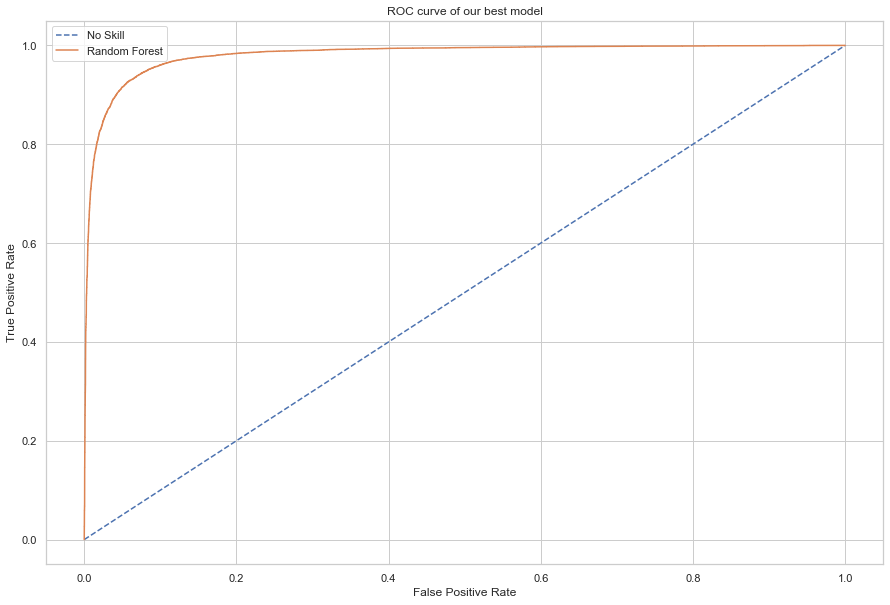

In [67]:
plot_roc_curve(final_model, X_test_sel, y_test)

<center>**Figure 10:** ROC Curve depicting the tradeoff between the TPR and FPR </center>

Since each False Negative costs us 50 times more than each False Positive, we need to see how much we can give up in True Positive Rate to improve our False Negative Rate. From the plot above it looks like we can easily reach <0.1 FPR if we are willing to sacrifice 0.2 of TPR. 

## Conclusion 

As a reminder the best parameters for our final model turned out to be:
* The number of trees in the forest: 200,
* The minimum number of samples required to split an internal node: 7
* The minimum number of samples required to be at a leaf node: 9

Usage of interaction features was also ultimately important for determining features as we lacked domain knowledge because there was no data dictionary. Our final model found a recall score of 92.26% at the cost of decreasing precision close about 3% from previous models down to 91.84%; however, this was important for decreasing penalty costs. As previously mentioned, each False Negative cost 500 dollars versus only 10 dollars for each False Positive. Thus, for every False Positive sacrificed to eliminate a False Negative, we decrease penalty costs by 490 dollars.

In conclusion, we learned that in building models, one needs to take into considersation of penalty costs and be aware of what needs to be given up while trying to improve the prediction accuracy. Especially, in the field of drug research, it becomes a more sensitive area and careful considerations need to be made as people's lives are on the line.